In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
from helper import *

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 1.Data Cleaning

In [31]:
portfolio_clean = clean_portfolio(portfolio)
profile_clean = clean_profile(profile)
transcript_clean = clean_transcript(transcript)

In [3]:
#preview dataset
portfolio_clean

,reward,difficulty,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,2.0,0.0,0.0,8.0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,8.0,2.0,0.0,0.0
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,0.0,7.0,2.0,0.0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,4.0,0.0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,NaN
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,NaN,NaN
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,NaN
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,NaN,NaN
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,NaN,NaN
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,NaN


In [4]:
# check number of records
portfolio_clean.shape

(10, 9)

In [6]:
#preview dataset
profile_clean.head(5)

,gender,age,customer_id,became_member_on,income,valid,gender_F,gender_M,gender_O
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,0,0,0
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,1,0,0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,0,0,0,0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,1,0,0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,0,0,0,0


In [7]:
# check number of records
profile_clean.shape

(17000, 9)

In [9]:
#preview dataset
transcript_clean.head(10)

,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN
5,389bc3fa690240e798340f5a15918d5c,0,0,1,0,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN
6,c4863c7985cf408faee930f111475da3,0,0,1,0,0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN
7,2eeac8d8feae4a8cad5a6af0499a211d,0,0,1,0,0,3f207df678b143eea3cee63160fa8bed,NaN
8,aa4862eba776480b8bb9c68455b8c2e1,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
9,31dda685af34476cad5bc968bdb01c53,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN


In [10]:
# check number of records
transcript_clean.shape

(306534, 8)

Below we will consolidate all the dataframes into one based on star schema. Fact table is derived from transcript_clean dataset. This dataframe will have several NaN values in places where that piece of data is not needed. For instance, in the event of an offer reception, the transaction value will be NaN. We'll ignore those in our analysis.

In [11]:
df = merge_datasets(portfolio_clean, profile_clean, transcript_clean)

In [12]:
#preview dataset
df.head()

,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_id,amount,gender,age,...,gender_M,gender_O,reward,difficulty,duration,offer_type,channel_email,channel_mobile,channel_social,channel_web
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,B3,NaN,F,75,...,0,0,5.0,5.0,7.0,bogo,0.0,0.0,4.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,D1,NaN,None,118,...,0,0,5.0,20.0,10.0,discount,NaN,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,D4,NaN,M,68,...,1,0,2.0,10.0,7.0,discount,NaN,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,D3,NaN,None,118,...,0,0,2.0,10.0,10.0,discount,NaN,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,B2,NaN,None,118,...,0,0,10.0,10.0,5.0,bogo,8.0,2.0,0.0,0.0


In [13]:
df.shape

(306534, 24)

## 2. Analysis

### Population Analysis
Let's check the total amount that the experiment ran

In [14]:
df.time.max() / 24

29.75

In [15]:
df.shape

(306534, 24)

The experiment was run for almost 30 days, and a grand total of 306,534 events were collected.

Number of offers by Order ID:
B4    7571
B2    7593
D3    7597
I1    7617
I2    7618
D4    7632
D2    7646
B1    7658
D1    7668
B3    7677
Name: offer_id, dtype: int64
Number of offers by Order Type:
informational    15235
bogo             30499
discount         30543
Name: offer_type, dtype: int64


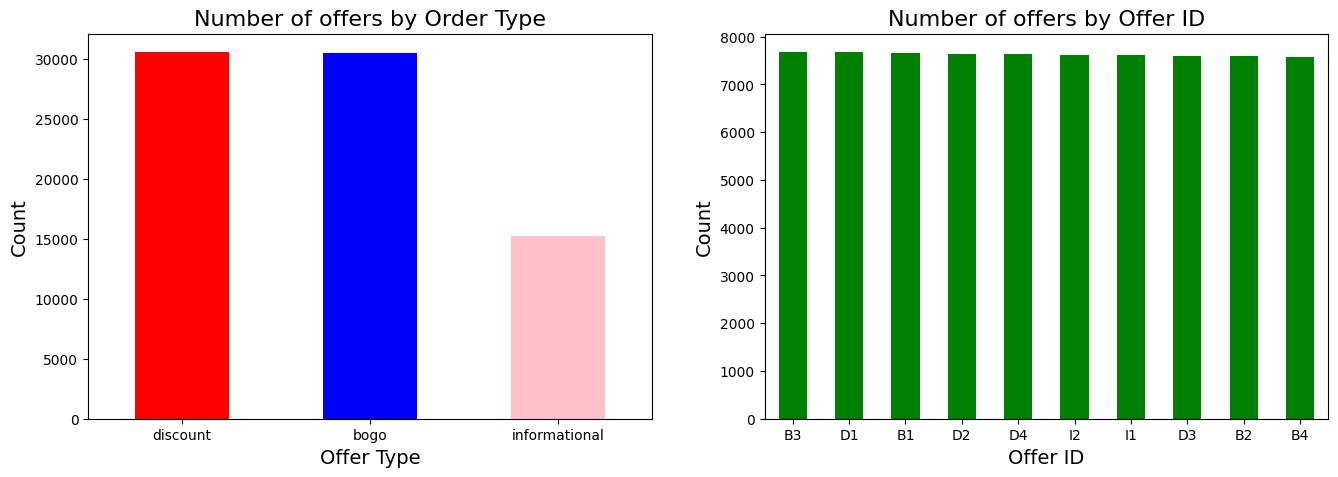

In [16]:
count_offer_id =df[df.event_offer_received == 1].offer_id.value_counts()
print("Number of offers by Order ID:")
print(count_offer_id.sort_values(ascending=True))
count_offer_type =df[df.event_offer_received == 1].offer_type.value_counts()
print("Number of offers by Order Type:")
print(count_offer_type.sort_values(ascending=True))

plt.subplot(121)
df[df.event_offer_received == 1].offer_type.value_counts().plot(kind='bar', rot=360, figsize=(16,5),color=['red', 'blue','pink'])
plt.title('Number of offers by Order Type',fontsize=16)
plt.xlabel('Offer Type',fontsize=14)
plt.ylabel('Count',fontsize=14);

plt.subplot(122)
df[df.event_offer_received == 1].offer_id.value_counts().plot(kind='bar', rot=360,color ='g')
plt.title('Number of offers by Offer ID',fontsize=16)
plt.xlabel('Offer ID',fontsize=14)
plt.ylabel('Count',fontsize=14);

Each offer was received almost the same number of times. The data simulator probably used a uniform distribution for distributing the offers.

### Customers Dataframe
This dataframe is intended to aggregate offer and transactional data on a per customer basis. This should facilitate the analysis of each customer's transactional behavior

In [17]:
customers = per_customer_data(df, profile_clean)

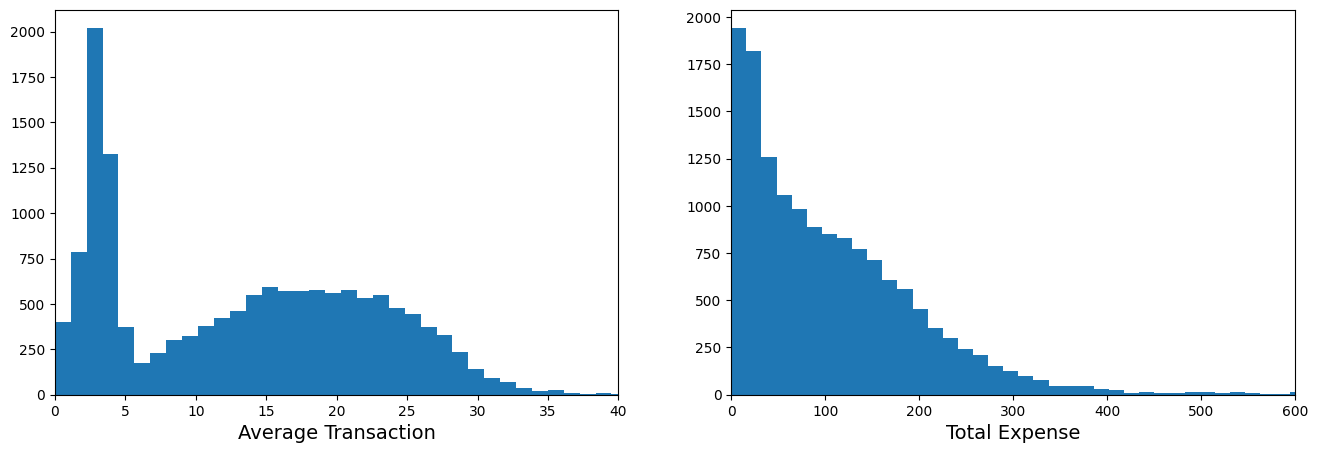

In [18]:
plt.figure(figsize=(16,5))

bins = 400

avg_transaction = customers[customers.valid == 1].total_expense / customers[customers.valid == 1].total_transactions
avg_transaction.fillna(0, inplace=True)
plt.subplot(121)
plt.hist(avg_transaction, bins)
plt.xlabel('Average Transaction',fontsize = 14)
ax = plt.gca();
ax.set_xlim(0,40);


bins = 100
plt.subplot(122)
plt.hist(customers[customers.valid == 1].total_expense, bins);
plt.xlabel('Total Expense',fontsize = 14)
ax = plt.gca();
ax.set_xlim(0,600);

The average transaction value seems to follow a bi-modal distribution, while the total expense an exponential distribution with negative parameter.

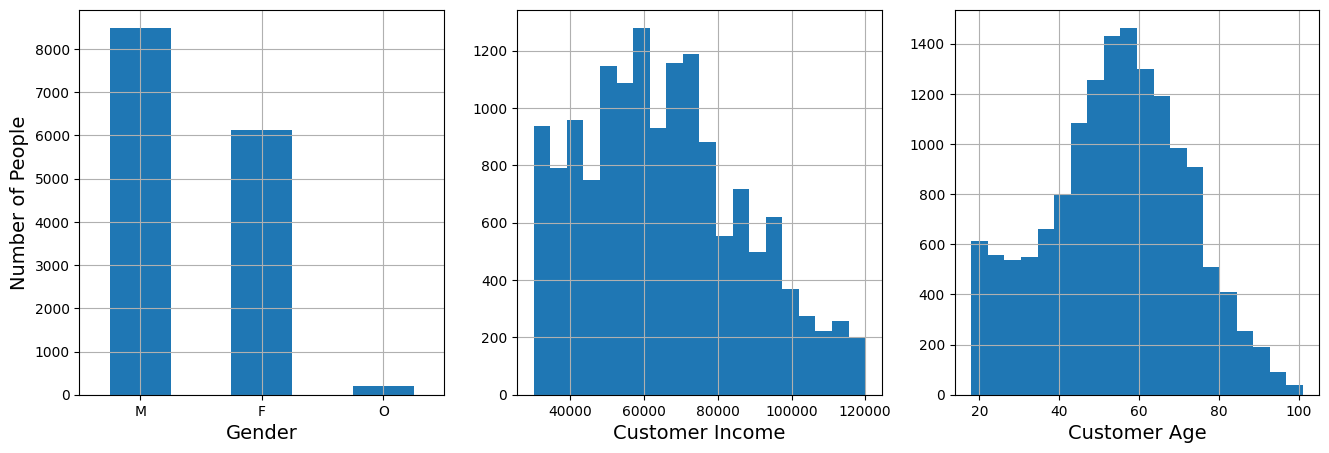

In [19]:
plt.figure(figsize=(16,5))

plt.subplot(131)
customers.gender.value_counts().reindex(['M', 'F', 'O']).plot(kind='bar', rot=0, figsize=(16,5), color='tab:blue');
plt.ylabel('Number of People',fontsize = 14);
plt.xlabel('Gender',fontsize = 14);
plt.grid();

plt.subplot(132)
cust_income = customers[customers.income_group > 0].income#_group.value_counts().reindex(range(30000, 111000,10000))
plt.xlabel('Customer Income',fontsize = 14);
plt.hist(cust_income, 20)
plt.grid()

plt.subplot(133)
cust_age = customers[customers.valid == 1].age
plt.xlabel('Customer Age',fontsize = 14);
plt.hist(cust_age, 20)
plt.grid(True)


Population distributions by gender, income and age. The sample provides significantly more males. Both the income and the age distribution seem to approach a normal distribution

Text(0, 0.5, '$')

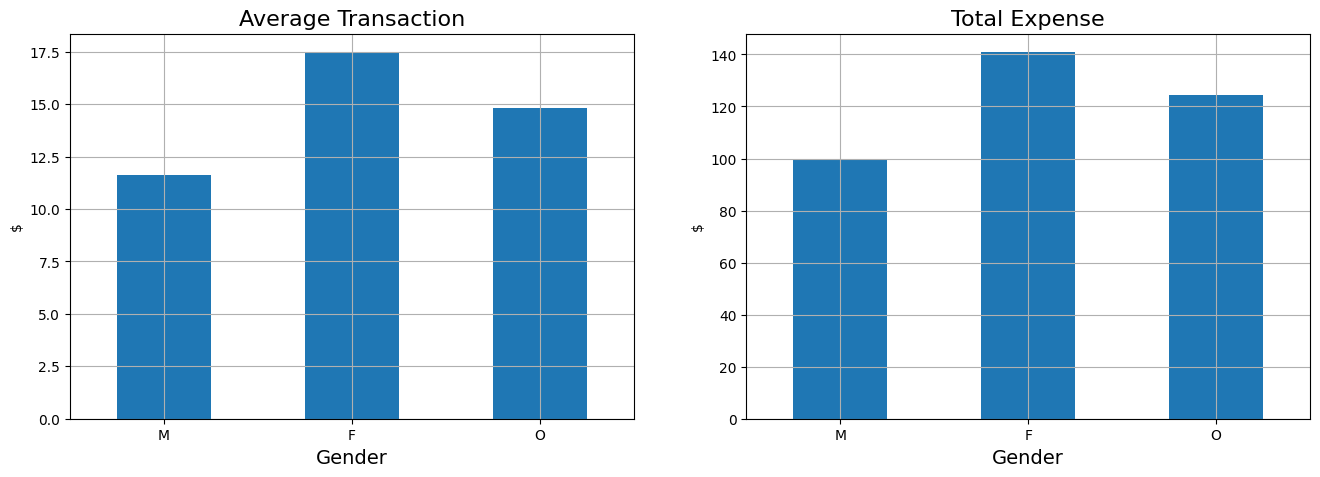

In [20]:
plt.figure(figsize=(16,5))

plt.subplot(121)
gender_groupby = customers[customers.valid == 1].groupby('gender')
gender_transacts = gender_groupby.total_transactions.sum()
gender_expense = gender_groupby.total_expense.sum()
(gender_expense / gender_transacts).reindex(['M', 'F', 'O']).plot(kind='bar', rot=0, color='tab:blue');
plt.title('Average Transaction',fontsize = 16);
plt.xlabel('Gender',fontsize = 14);
plt.grid();
plt.ylabel('$')

plt.subplot(122)
gender_groupby.total_expense.mean().reindex(['M', 'F', 'O']).plot(kind='bar', rot=0, color='tab:blue');
plt.title('Total Expense',fontsize = 16);
plt.xlabel('Gender',fontsize = 14);
plt.grid();
plt.ylabel('$')

By gender, women make more expensive tranasactions and spend more money in general. Men spent the least in both metrics.

(0.0, 200.0)

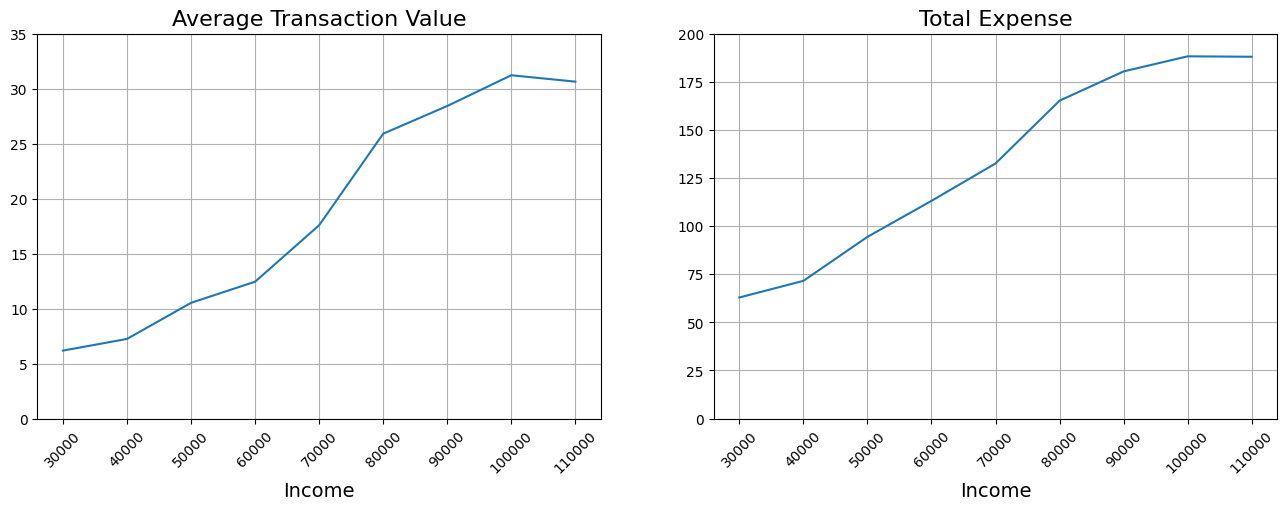

In [21]:
plt.figure(figsize=(16,5))

plt.subplot(121)
income_groupby = customers[(customers.valid == 1) & (customers.income_group > 0)].groupby('income_group')
income_transacts = income_groupby.total_transactions.sum()
income_expense = income_groupby.total_expense.sum()
ax = (income_expense / income_transacts).reindex(range(30000, 111000,10000)).plot(kind='line', rot=45, color='tab:blue');
plt.title('Average Transaction Value',fontsize = 16);
plt.xlabel('Income',fontsize = 14)
plt.grid()
ax.set_ylim(0, 35)

plt.subplot(122)
ax = income_groupby.total_expense.mean().reindex(range(30000, 111000,10000)).plot(kind='line', rot=45, color='tab:blue');
plt.title('Total Expense',fontsize = 16);
plt.xlabel('Income',fontsize = 14)
plt.grid()
ax.set_ylim(0, 200)

Expenses and average transaction value grow as the income grows, which is expected.

(0.0, 140.0)

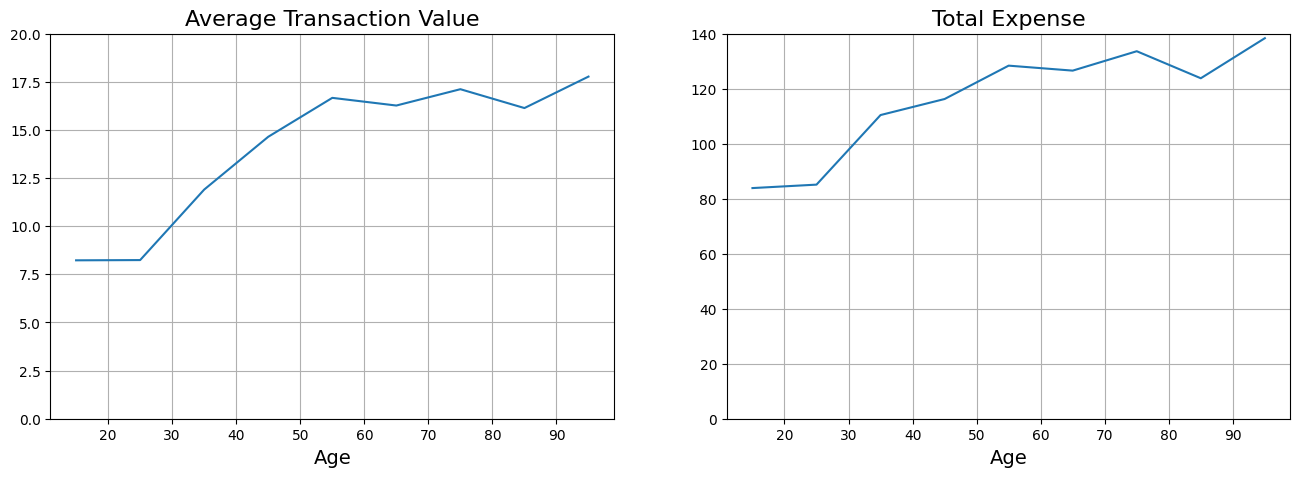

In [22]:
plt.figure(figsize=(16,5))


plt.subplot(121)
age_groupby = customers[(customers.valid == 1) & (customers.income_group > 0)].groupby('age_group')
age_transacts = age_groupby.total_transactions.sum()
age_expense = age_groupby.total_expense.sum()
ax = (age_expense / age_transacts).reindex(range(15, 96,10)).plot(kind='line', rot=0, color='tab:blue');
plt.title('Average Transaction Value',fontsize = 16);
ax.set_ylim(0, 20)
plt.grid(True)
plt.xlabel('Age',fontsize = 14);


plt.subplot(122)
ax = age_groupby.total_expense.mean().reindex(range(15, 96,10)).plot(kind='line', rot=0, color='tab:blue');
plt.title('Total Expense',fontsize = 16);
plt.grid(True);
plt.xlabel('Age',fontsize = 14)
ax.set_ylim(0, 140)

Similarly to income, as people get older, the value of their transactions and the total expense increases. This might be to the fact that there is a direct correlation between age and income.

## Offer Analysis

### Analysis per offer kind

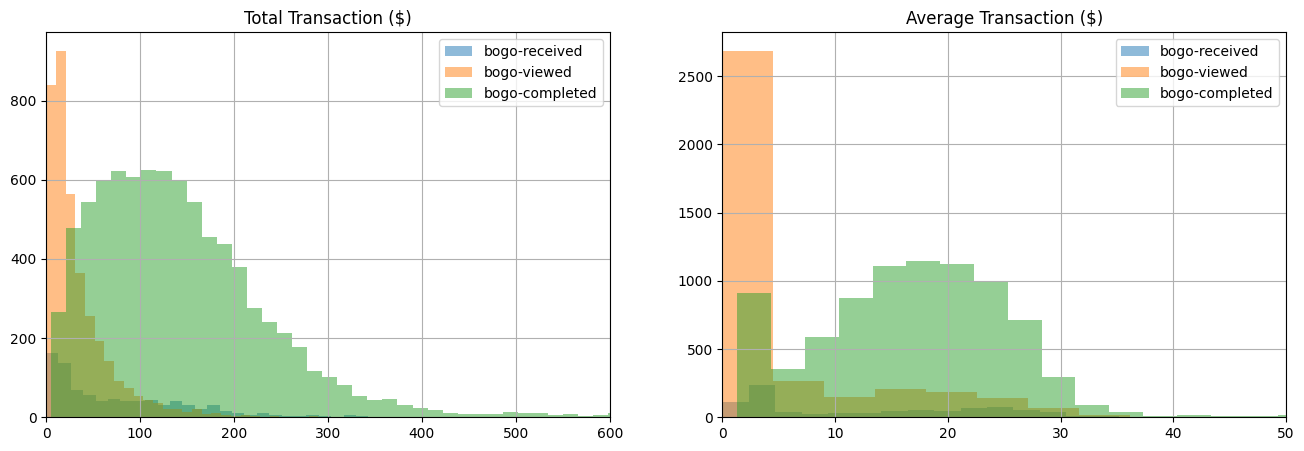

In [23]:
plot_offer_expense(customers, 'bogo')

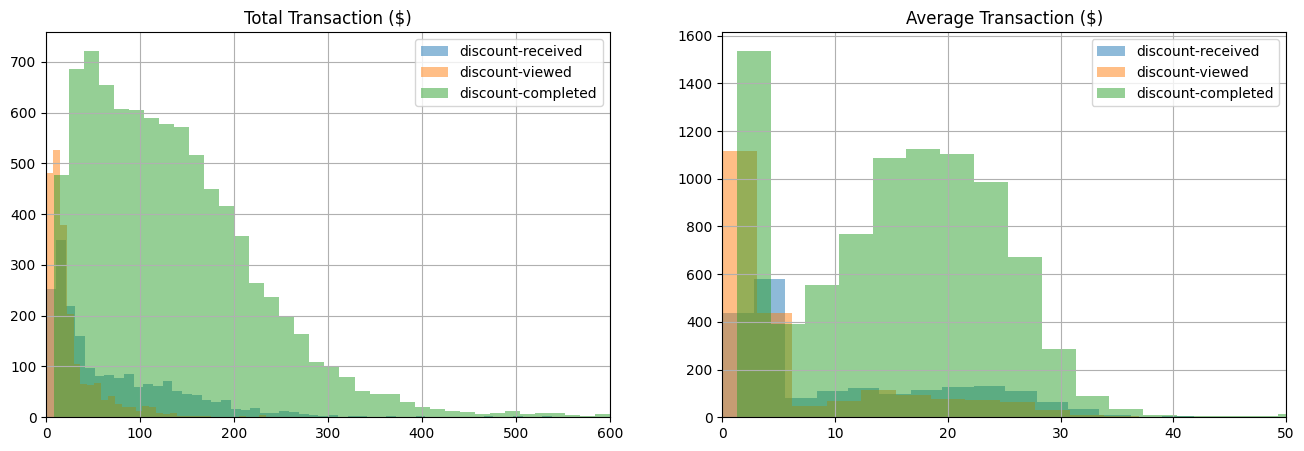

In [24]:
plot_offer_expense(customers, 'discount')

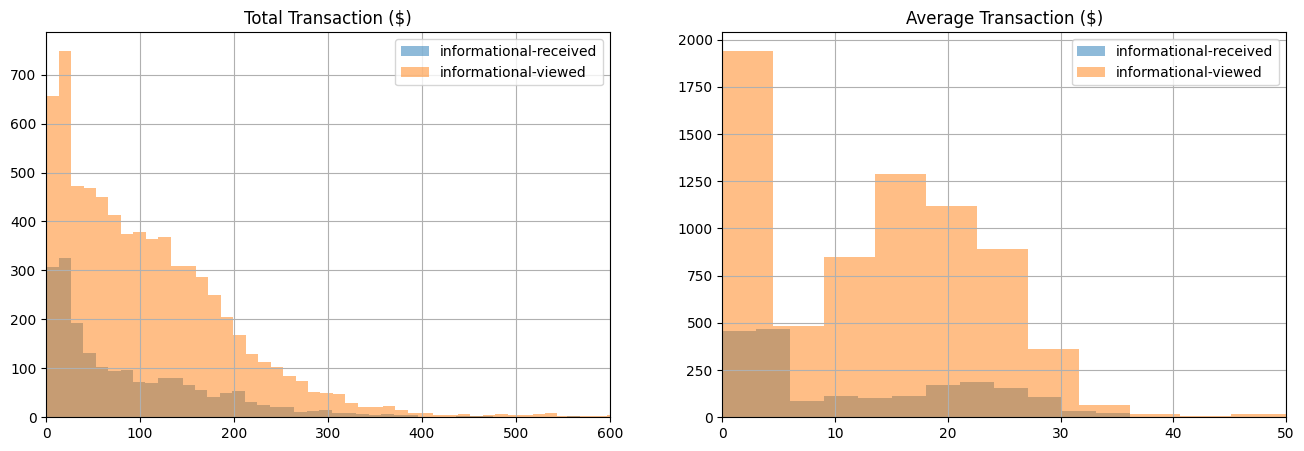

In [25]:
plot_offer_expense(customers, 'informational')

It is clear that customer that complete the offers (or view them in the case of informational ones) spend more money per transaction and in total

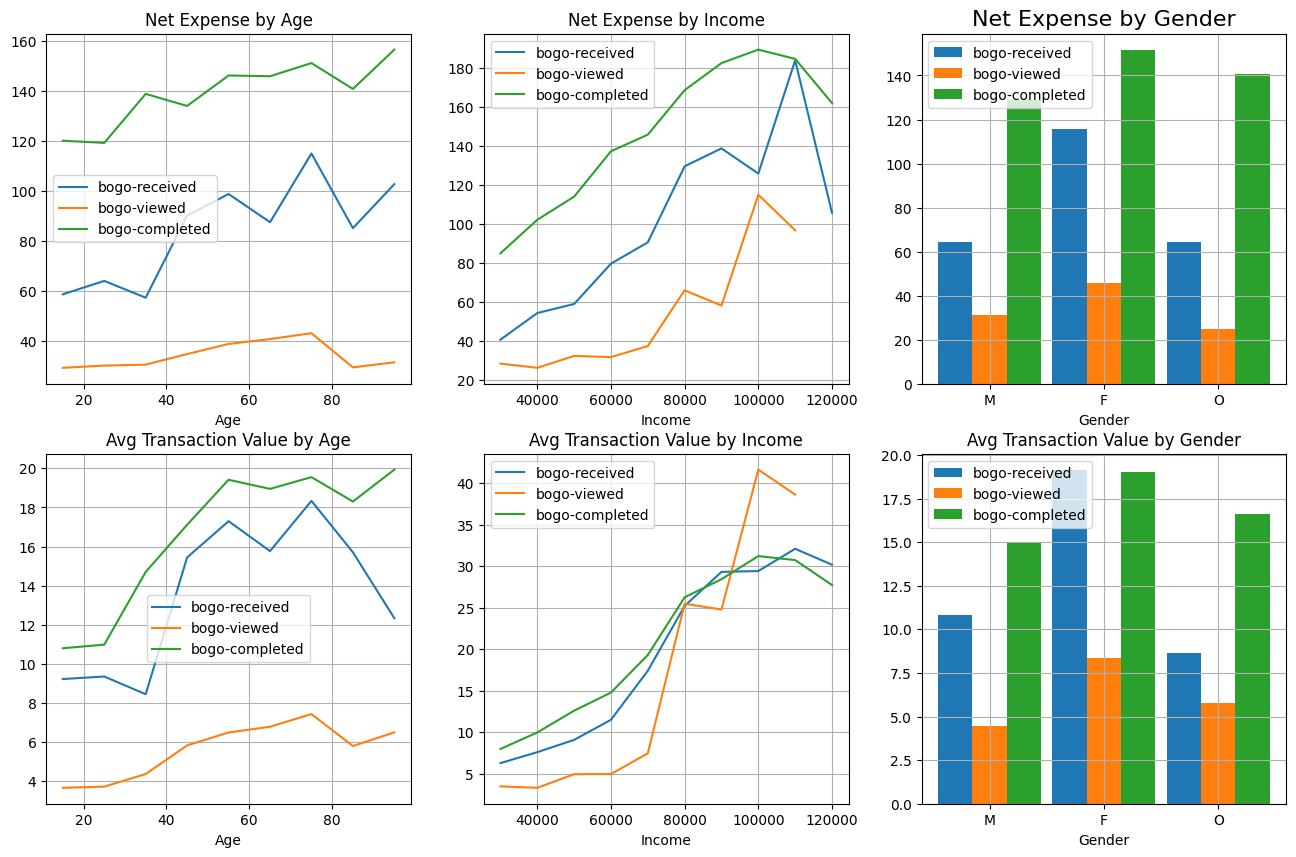

In [26]:
plot_offer_expense_by(customers, 'bogo')

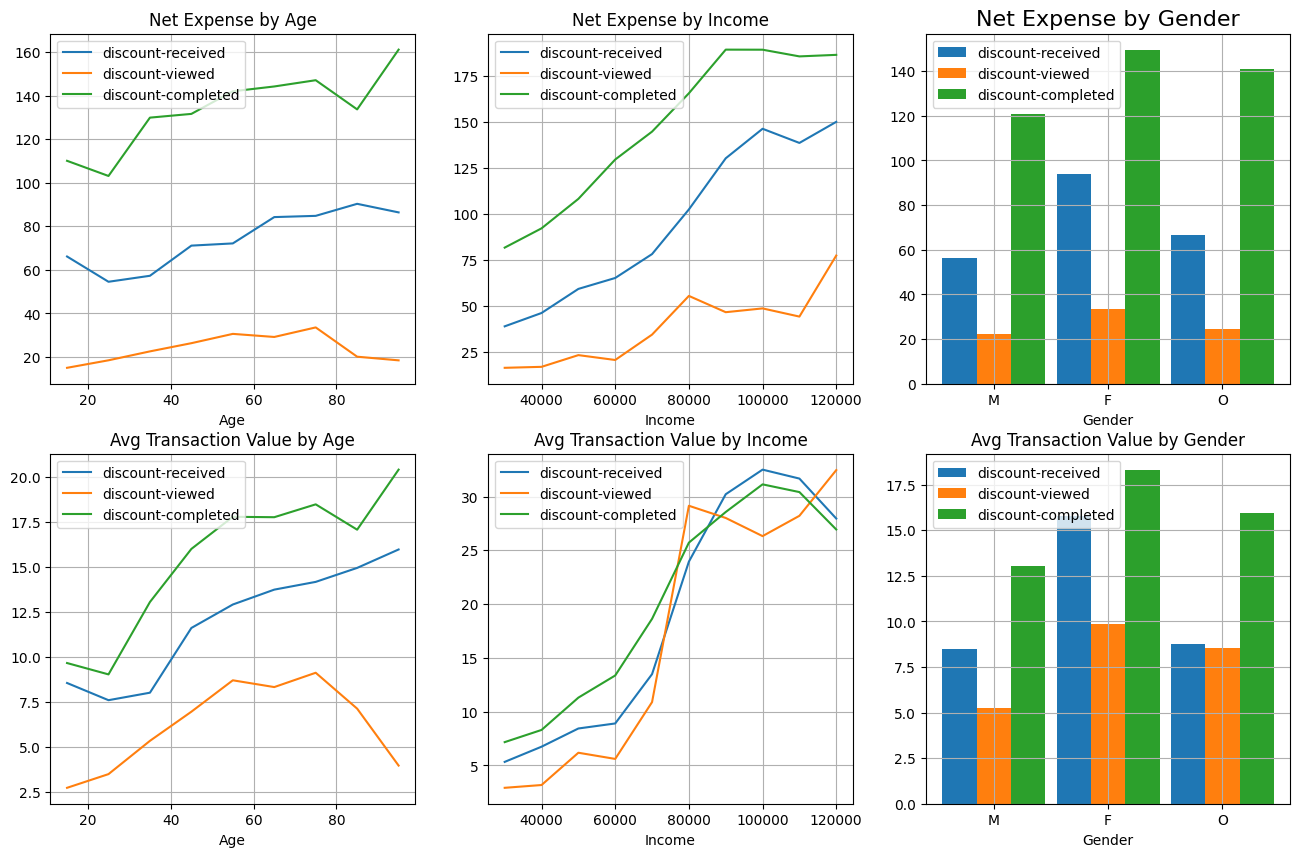

In [27]:
plot_offer_expense_by(customers, 'discount')

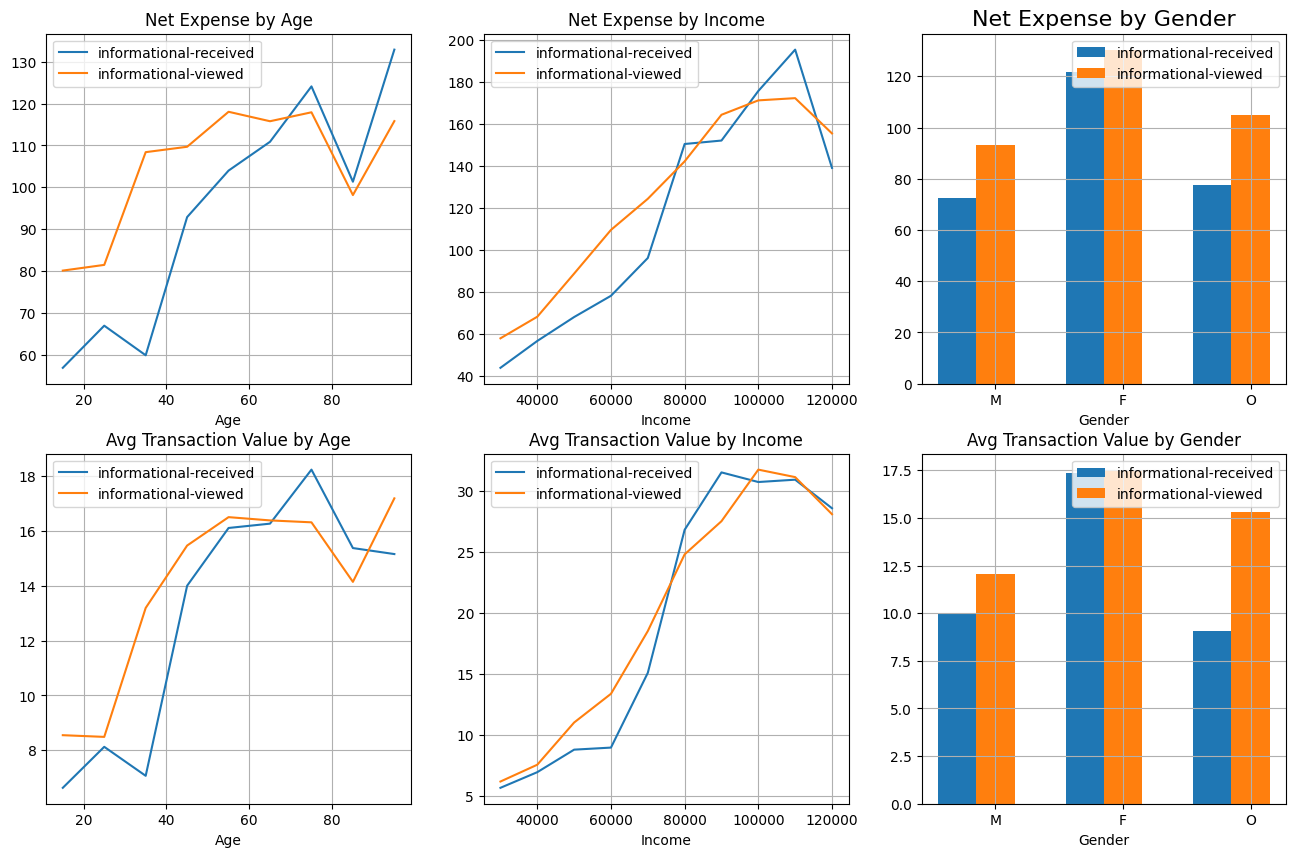

In [28]:
plot_offer_expense_by(customers, 'informational')

The spending patterns are similar for customers that received, viewed and completed offers. It's important to note that for informational offers, they seem to be more relevant for younger customers. Similarly, customers that make less than $80,000 don't seem to be impacted by this kind of offers.

In [30]:
customers.corr(numeric_only=True).style.background_gradient(cmap='PiYG')

,total_expense,total_transactions,received,viewed,completed,reward,bogo_received,bogo_viewed,bogo_completed,bogo_reward,discount_received,discount_viewed,discount_completed,discount_reward,informational_received,informational_viewed,B1_received,B1_viewed,B1_completed,B1_reward,B2_received,B2_viewed,B2_completed,B2_reward,B3_received,B3_viewed,B3_completed,B3_reward,B4_received,B4_viewed,B4_completed,B4_reward,D1_received,D1_viewed,D1_completed,D1_reward,D2_received,D2_viewed,D2_completed,D2_reward,D3_received,D3_viewed,D3_completed,D3_reward,D4_received,D4_viewed,D4_completed,D4_reward,I1_received,I1_viewed,I2_received,I2_viewed,age,income,valid,gender_F,gender_M,gender_O,age_group,income_group,net_expense
total_expense,1.000000,0.351542,0.082994,0.167128,0.572735,0.541260,0.042942,0.071822,0.444046,0.447452,0.050320,0.124214,0.414149,0.400624,-0.017972,0.017266,0.039769,0.035620,0.284245,0.284245,0.015486,0.019398,0.269035,0.269035,-0.005803,0.049479,0.184629,0.184629,0.025281,0.027270,0.216998,0.216998,-0.007914,0.064973,0.244858,0.244858,0.034141,0.037755,0.189929,0.189929,0.067336,0.071937,0.226641,0.226641,-0.004952,0.064295,0.211029,0.211029,-0.023323,0.032312,-0.001118,-0.004773,-0.145518,0.315033,0.261033,0.217539,-0.038460,0.017746,0.256667,0.397126,0.997941
total_transactions,0.351542,1.000000,0.160192,0.192798,0.424793,0.324345,0.089196,0.127096,0.251440,0.229838,0.096899,0.121154,0.382454,0.332873,-0.042478,-0.011450,0.074132,0.118215,0.125395,0.125395,0.044304,0.047206,0.106676,0.106676,-0.003774,0.011419,0.124588,0.124588,0.040617,0.042621,0.178153,0.178153,-0.029770,-0.035931,0.108287,0.108287,0.079340,0.079475,0.246371,0.246371,0.132056,0.136459,0.287067,0.287067,-0.011029,0.005641,0.138437,0.138437,-0.039451,-0.037182,-0.018262,0.016080,-0.165615,-0.266050,0.095755,-0.017113,0.079295,0.004991,-0.033679,-0.107778,0.340591
received,0.082994,0.160192,1.000000,0.586999,0.297258,0.249674,0.375629,0.315282,0.209000,0.193645,0.384839,0.279266,0.235693,0.215718,0.251360,0.184462,0.158317,0.140211,0.095927,0.095927,0.164584,0.157281,0.106571,0.106571,0.159753,0.094742,0.120164,0.120164,0.170245,0.160489,0.123000,0.123000,0.155746,0.066121,0.100924,0.100924,0.170738,0.160548,0.130125,0.130125,0.166261,0.158283,0.129983,0.129983,0.181254,0.117714,0.130290,0.130290,0.176364,0.108805,0.164944,0.142782,-0.001085,-0.006450,-0.002787,-0.005021,0.006810,-0.017348,-0.004889,-0.006122,0.067204
viewed,0.167128,0.192798,0.586999,1.000000,0.324325,0.294070,0.312097,0.499914,0.255086,0.256130,0.156590,0.494592,0.231010,0.186091,0.119852,0.340310,0.152349,0.202637,0.147578,0.147578,0.202203,0.219612,0.167839,0.167839,-0.025131,0.242353,0.055618,0.055618,0.213976,0.230085,0.178438,0.178438,-0.132664,0.238068,0.017473,0.017473,0.210251,0.226241,0.178407,0.178407,0.208558,0.224095,0.183234,0.183234,-0.010955,0.254865,0.084352,0.084352,-0.004031,0.259311,0.166459,0.215398,0.072948,0.052653,-0.065088,-0.002413,-0.045982,0.021706,-0.020625,-0.012075,0.151252
completed,0.572735,0.424793,0.297258,0.324325,1.000000,0.891921,0.186365,0.198154,0.738538,0.710898,0.254425,0.307320,0.758640,0.724248,-0.201995,-0.136666,0.076774,0.068785,0.407639,0.407639,0.047041,0.049732,0.398371,0.398371,0.096095,0.137675,0.385883,0.385883,0.103713,0.106448,0.388294,0.388294,0.049673,0.110651,0.409785,0.409785,0.150700,0.149909,0.386947,0.386947,0.165553,0.166911,0.398197,0.398197,0.080181,0.141929,0.398418,0.398418,-0.139170,-0.047822,-0.135100,-0.132666,-0.211809,0.257836,0.346738,0.257209,-0.021389,0.027155,0.319287,0.412304,0.527164
reward,0.541260,0.324345,0.249674,0.294070,0.891921,1.000000,0.366601,0.375507,0.891232,0.932508,0.007676,0.068590,0.451962,0.483715,-0.172308,-0.112271,0.254774,0.233234,0.625647,0.625647,0.208250,0.209915,0.603550,0.603550,0.083879,0.126367,0.347699,0.347699,0.091126,0.094256,0.348096,0.348096,0.045145,0.107337,0.373936,0.373936,0.030639,0.031473,0.221609,0.221609,-0.013829,-0.011065,0.170147,0.170147,-0.048300,0.027865,0.20192

Correlation shows that the offer completions have some impact on the spending habits of customers. Also, income and gender seem to have some impact as well

# 3. Offer Recommendation

#### Simple recommendation system

Knowledge based recommendations for the users without demographics data.<br>

Get the most popular offers to the users without demographics data.<br>

Based on data for customers with:<br>

<li>possitive net_expense</li>
<li>at least 5 transactions completed</li>
<li>only count offers that were both viewed and completed</li>

In [ ]:
offers = get_most_popular_offers(customers, n_top=10)
print(offers[0])
print(offers[1])

['B2', 'B1', 'D1', 'D4', 'B3', 'B4', 'D3', 'D2', 'I1', 'I2']
{'B2': 144.72500000000002, 'B1': 144.505, 'D1': 144.4, 'D4': 133.92, 'B3': 127.47999999999999, 'B4': 126.145, 'D3': 125.105, 'D2': 117.8, 'I1': 109.77000000000001, 'I2': 88.41}


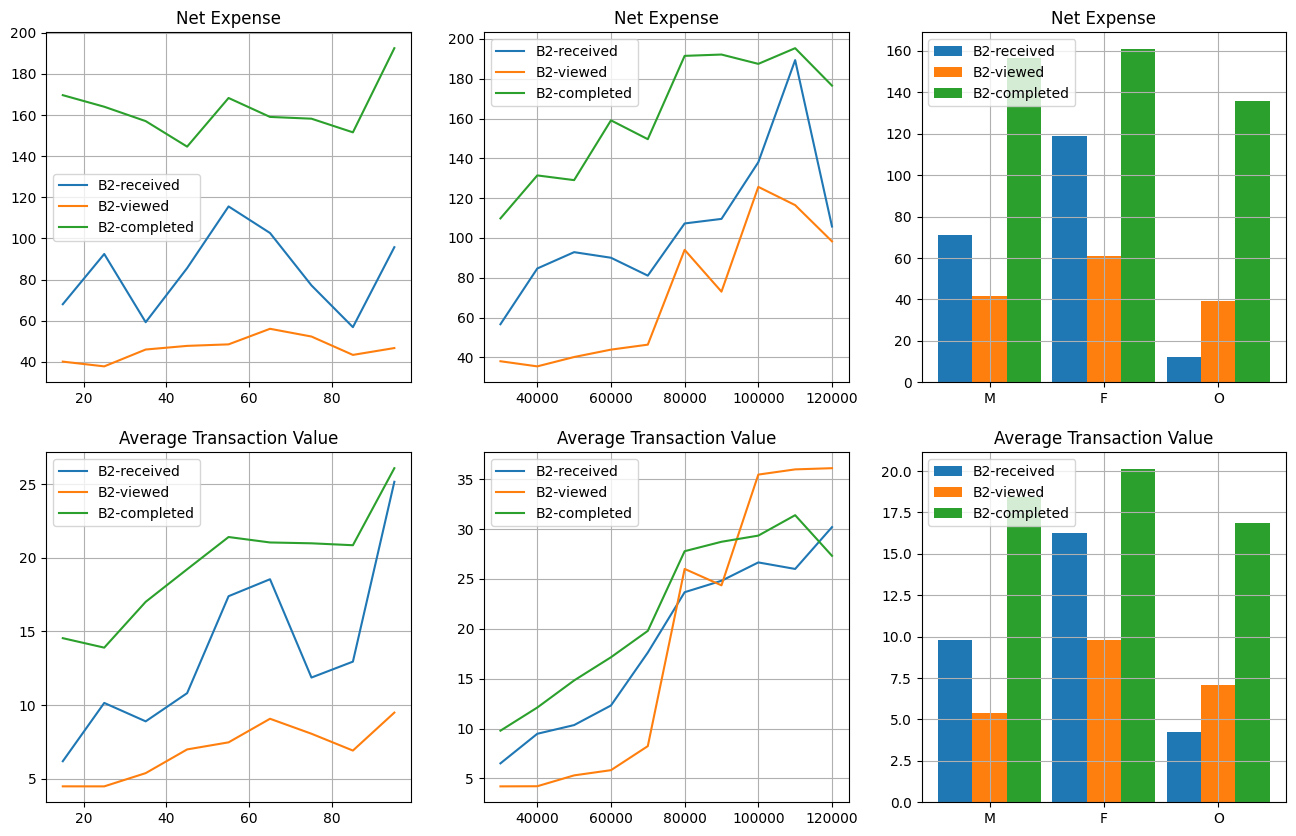

In [ ]:
plot_offer_expense_by(customers, 'B2')

This recommendation system doesn't take into account any demographics data. We can see that in the chosen offer (B2), the average transaction value for persons who earn more than $90,000 is lower for completed than for browsed offers. The best option for that population might not be this one

###  Recommendation system with filters

Knowledge based recommendations for the users using demographics data as filters.<br>

Based on data for customers with:<br>

<li>possitive net_expense
<li>at least 5 transactions completed
<li>only count offers that were both viewed and completed

In [ ]:
offers = get_most_popular_offers_filtered(customers, n_top=10, income=95000)
print(offers[0])
print(offers[1])

['B3', 'D3', 'D1', 'D4', 'B1', 'D2', 'B4', 'B2', 'I1', 'I2']
{'B3': 204.325, 'D3': 204.22000000000003, 'D1': 204.21, 'D4': 197.41, 'B1': 196.62, 'D2': 195.17000000000002, 'B4': 187.98, 'B2': 186.17, 'I1': 185.275, 'I2': 180.415}


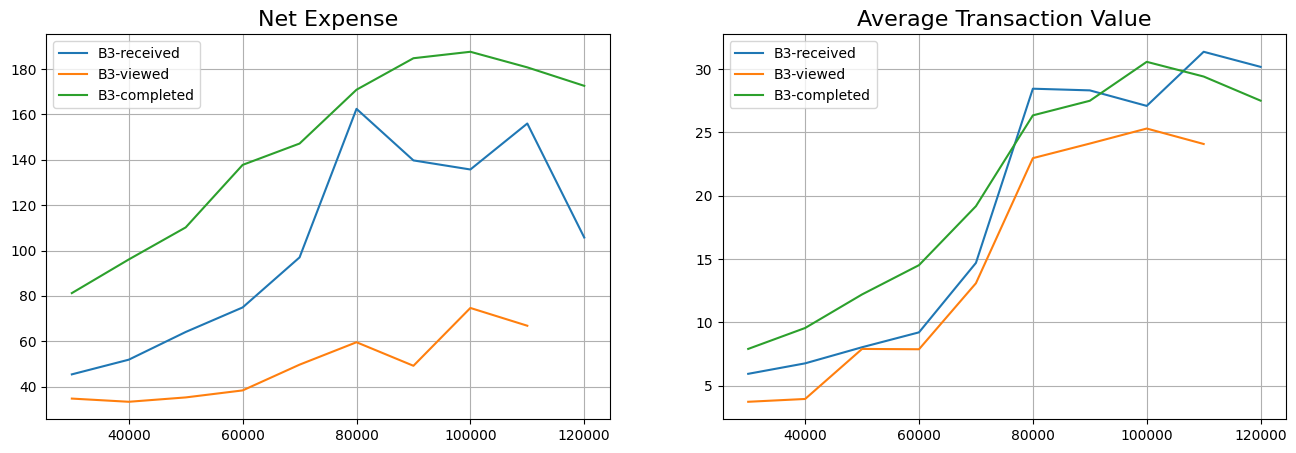

In [ ]:
offer = 'B3'
rcv_by, vwd_by, cpd_by = get_offer_stat_by(customers, 'net_expense', offer, 'income_group', aggr='mean')
rcv_avg_by, vwd_avg_by, cpd_avg_by = get_average_expense_by(customers, offer, 'income_group')

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(rcv_by, label='{}-received'.format(offer))
plt.plot(vwd_by, label='{}-viewed'.format(offer))
plt.plot(cpd_by,  label='{}-completed'.format(offer))
plt.legend(loc='best')
plt.title('Net Expense',fontsize = 16);
plt.grid();

plt.subplot(122)
plt.plot(rcv_avg_by, label='{}-received'.format(offer))
plt.plot(vwd_avg_by, label='{}-viewed'.format(offer))
plt.plot(cpd_avg_by, label='{}-completed'.format(offer))
plt.legend(loc='best')
plt.title('Average Transaction Value',fontsize = 16);
plt.grid();

Here we see that for this demographic, the completed offers data for the recommended offer (B3) provides both the maximum net expense and average transaction value<br>

<b>What about for gender?

In [ ]:
offers = get_most_popular_offers_filtered(customers, n_top=10, gender='M')
print(offers[0])
print(offers[1])

['B2', 'D1', 'B1', 'D4', 'B3', 'B4', 'D3', 'I1', 'D2', 'I2']
{'B2': 138.835, 'D1': 136.89, 'B1': 136.45, 'D4': 126.485, 'B3': 119.77000000000001, 'B4': 115.61, 'D3': 110.4, 'I1': 109.575, 'D2': 101.88, 'I2': 71.005}


The recommendation system provides the same as the systems without filters. Maybe due to the fact that most of the population are men.

In [ ]:
offers = get_most_popular_offers_filtered(customers, n_top=10, gender='F')
print(offers[0])
print(offers[1])

['D1', 'D4', 'B1', 'D3', 'B2', 'B4', 'D2', 'I1', 'B3', 'I2']
{'D1': 154.82999999999998, 'D4': 154.62, 'B1': 153.745, 'D3': 153.59, 'B2': 150.37, 'B4': 145.22, 'D2': 145.03, 'I1': 142.23, 'B3': 141.61, 'I2': 132.5}


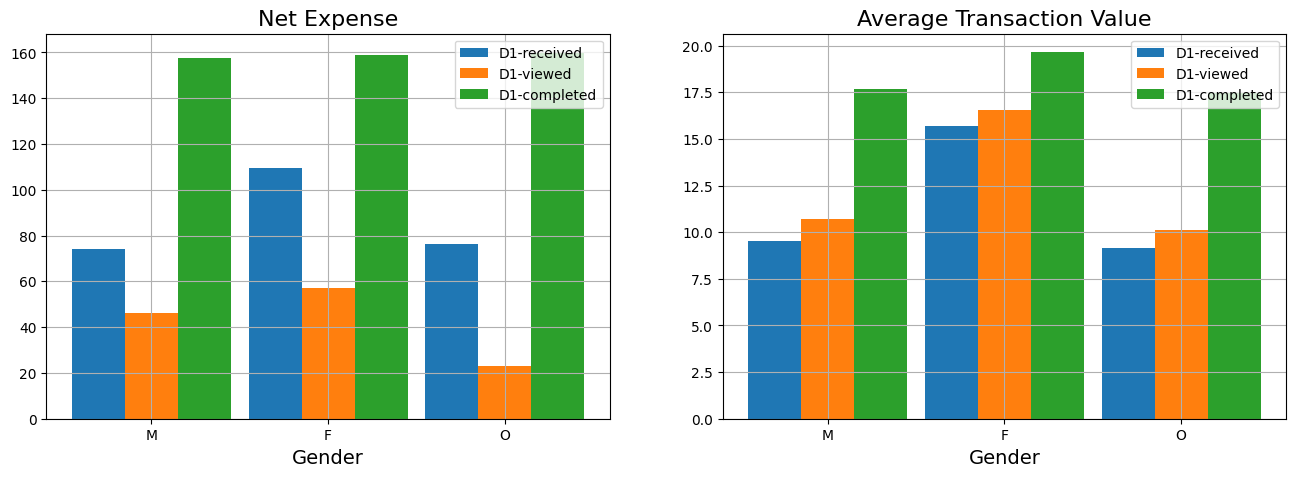

In [ ]:
rcv_gender, vwd_gender, cpd_gender = get_offer_stat_by(customers, 'net_expense', 'D1', 'gender', aggr='mean')
rcv_avg_gender, vwd_avg_gender, cpd_avg_gender = get_average_expense_by(customers, 'D1', 'gender')

plt.figure(figsize=(16,5))

plt.subplot(121)
index = np.array([0,1,2])
bar_width = 0.3

plt.bar(index, rcv_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-received')
plt.bar(index + bar_width, vwd_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-viewed')
plt.bar(index + 2*bar_width, cpd_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-completed')
plt.grid()
plt.legend(loc='best')
plt.title('Net Expense',fontsize = 16)
plt.xlabel('Gender',fontsize = 14)
plt.xticks(index + bar_width, ('M', 'F', 'O'));

plt.subplot(122)

index = np.array([0,1,2])
bar_width = 0.3
plt.bar(index, rcv_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-received')
plt.bar(index + bar_width, vwd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-viewed')
plt.bar(index + 2*bar_width, cpd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-completed')
plt.grid()
plt.legend(loc='best')
plt.title('Average Transaction Value',fontsize = 16)
plt.xlabel('Gender',fontsize = 14)
plt.xticks(index + bar_width, ('M', 'F', 'O'));

We noticed that for women the first recommendation is D1. This shows that women don't care too much of the higher rewards like BOGO offers but the coffee itself.

In [ ]:
offers = get_most_popular_offers_filtered(customers, n_top=10, gender='O')
print(offers[0])
print(offers[1])

['B3', 'D4', 'B1', 'D3', 'D1', 'D2', 'B2', 'I1', 'B4', 'I2']
{'B3': 162.78, 'D4': 162.78, 'B1': 160.93, 'D3': 160.42, 'D1': 143.25, 'D2': 142.74, 'B2': 138.84, 'I1': 129.655, 'B4': 122.44, 'I2': 88.63}


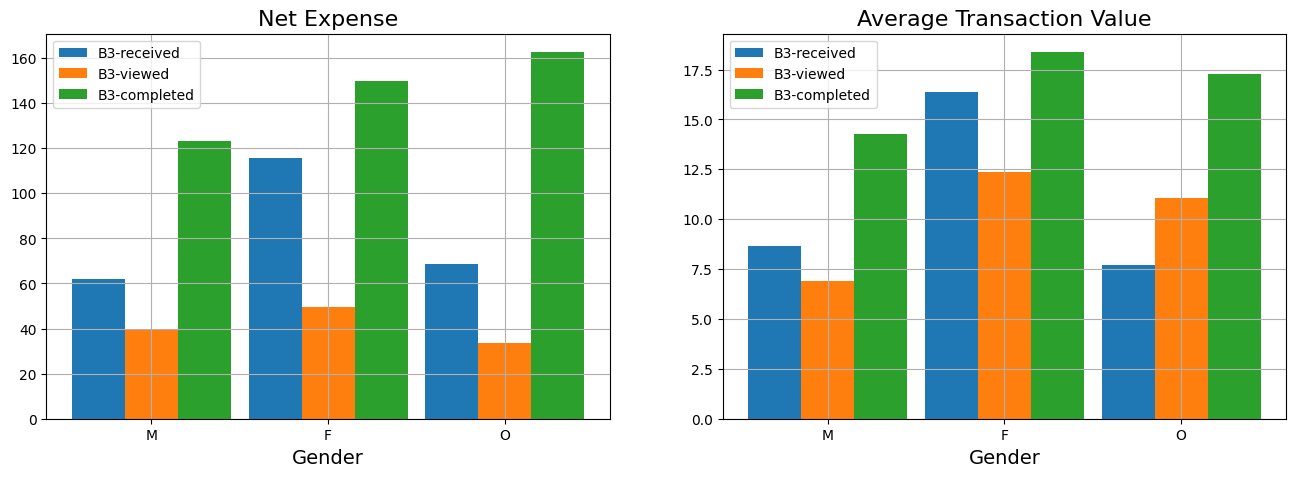

In [ ]:
rcv_gender, vwd_gender, cpd_gender = get_offer_stat_by(customers, 'net_expense', 'B3', 'gender', aggr='mean')
rcv_avg_gender, vwd_avg_gender, cpd_avg_gender = get_average_expense_by(customers, 'B3', 'gender')

plt.figure(figsize=(16,5))

plt.subplot(121)
index = np.array([0,1,2])
bar_width = 0.3

plt.bar(index, rcv_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-received')
plt.bar(index + bar_width, vwd_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-viewed')
plt.bar(index + 2*bar_width, cpd_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Net Expense',fontsize =16)
plt.xlabel('Gender',fontsize = 14);
plt.xticks(index + bar_width, ('M', 'F', 'O'));

plt.subplot(122)

index = np.array([0,1,2])
bar_width = 0.3
plt.bar(index, rcv_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-received')
plt.bar(index + bar_width, vwd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-viewed')
plt.bar(index + 2*bar_width, cpd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='B3-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Average Transaction Value',fontsize = 16)
plt.xlabel('Gender',fontsize = 14)
plt.xticks(index + bar_width, ('M', 'F', 'O'));

Finally, the suggested offer for other genders is B3. This makes sense given that the other gender's net cost in relation to the other genders is higher for this service. Additionally, the average transaction value is substantial, only $1 less than that for women.